# Pymaceuticals Inc.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_challenge_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_challenge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
merged_challenge_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_challenge_df[merged_challenge_df.duplicated(subset=['Mouse ID','Timepoint'], keep = False)]['Mouse ID'].unique()

# Display output
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Display all of the data for the duplicate mouse ID. 
duplicate_mice_df = merged_challenge_df[merged_challenge_df.duplicated(subset=['Mouse ID','Timepoint'], keep = False)]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_challenge_df = merged_challenge_df[merged_challenge_df['Mouse ID'].isin(duplicate_mice)==False]

# Display output
clean_challenge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Check the number of mice in the new, clean DataFrame
clean_challenge_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_data = clean_challenge_df.groupby('Drug Regimen')
#drug_regimen_data.head()

# mean, median, variance, standard deviation, and SEM of the tumor volume:
mean = drug_regimen_data['Tumor Volume (mm3)'].mean()
median = drug_regimen_data['Tumor Volume (mm3)'].median() 
variance = drug_regimen_data['Tumor Volume (mm3)'].var()
stdev = drug_regimen_data['Tumor Volume (mm3)'].std()
sem = drug_regimen_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_stats_summary = pd.DataFrame({
     "Mean Tumor Volume": mean,
     "Median Tumor Volume": median,
     "Tumor Volume Variance": variance,
     "Tumor Volume Std.Dev.": stdev,
     "Tumor Volume Std.Err.": sem,
})

# Display output
drug_stats_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats_agg = clean_challenge_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display output
drug_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

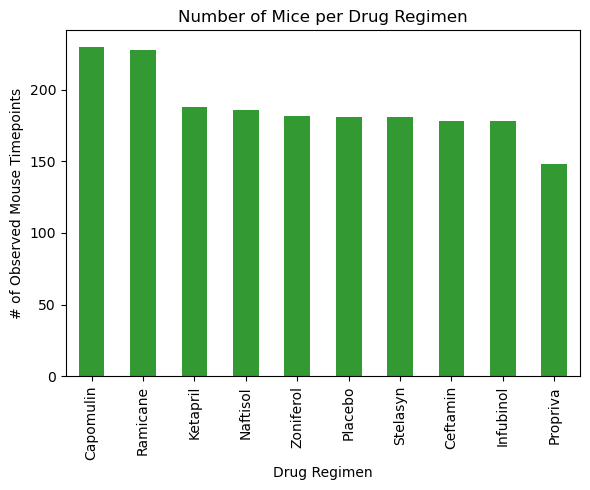

In [9]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_barchart = clean_challenge_df.groupby(['Drug Regimen']).count()['Mouse ID'].sort_values(ascending=False)

pandas_barchart.plot(kind="bar", figsize=(6,5),color='g', alpha=0.8, align="center")
plt.title('Number of Mice per Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

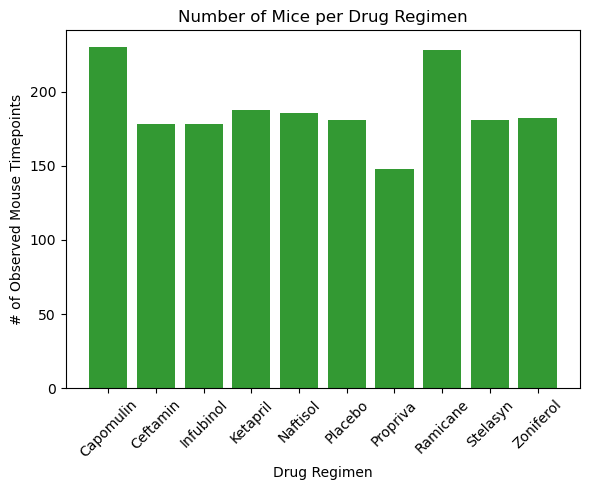

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_barchart = clean_challenge_df.groupby(['Drug Regimen']).count()[['Mouse ID']]

# Set x axis and tick locations
x_axis = np.arange(len(pyplot_barchart))
ticks = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,5))
plt.bar(x_axis, pyplot_barchart['Mouse ID'], color='g', alpha=0.8, align="center")
plt.xticks(ticks, pyplot_barchart.index.values, rotation=45)

# Set a Title and labels
plt.title('Number of Mice per Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the graph
plt.tight_layout()
plt.show()


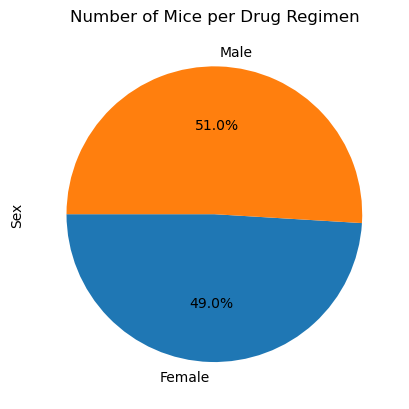

<Figure size 600x500 with 0 Axes>

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_piechart = clean_challenge_df.groupby(['Sex']).count()['Mouse ID']

pandas_piechart.plot(kind="pie", autopct='%1.1f%%',startangle=180)
plt.title('Number of Mice per Drug Regimen')
plt.ylabel("Sex")
plt.figure(figsize=(6,5))
plt.tight_layout()

<Figure size 600x500 with 0 Axes>

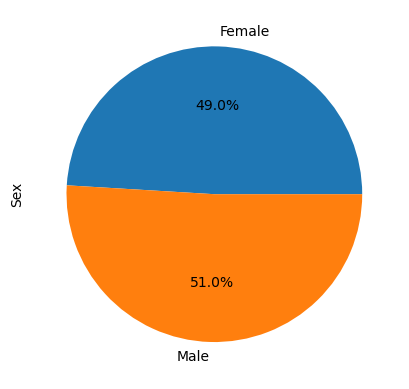

<Figure size 600x500 with 0 Axes>

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_piechart = clean_challenge_df.groupby(['Sex']).count()['Mouse ID'].plot.pie(y='Mouse ID', autopct="%1.1f%%", startangle=360)
plt.ylabel('Sex')
plt.figure(figsize=(6,5))

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse...
max_tp = clean_challenge_df.groupby('Mouse ID').max()[['Timepoint']]

# Merge this with the cleaned dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_challenge_df, max_tp, how='inner', on=('Mouse ID', 'Timepoint'))

# Display output
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # Add subset (each drug) to the list above
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outlier_tumor_vol = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outlier_tumor_vol} ")


Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 


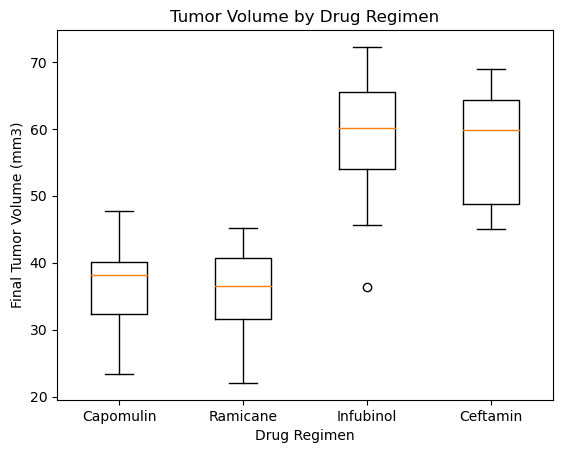

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vol_data, labels=treatments)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

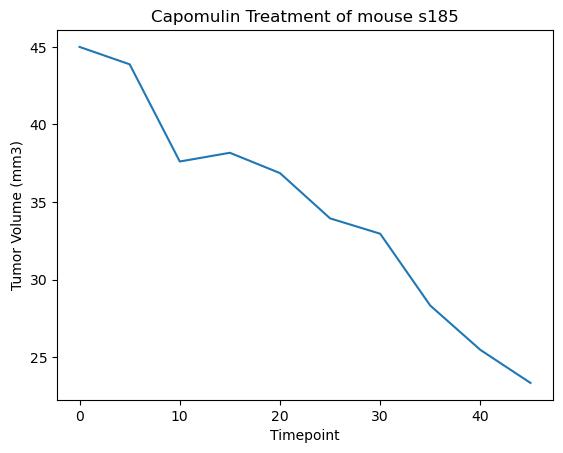

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_challenge_df.loc[clean_challenge_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse = capomulin_mice.loc[capomulin_mice['Mouse ID'] == 's185']

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13620\2779827026.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mice = clean_challenge_df.loc[clean_challenge_df['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID']).mean()


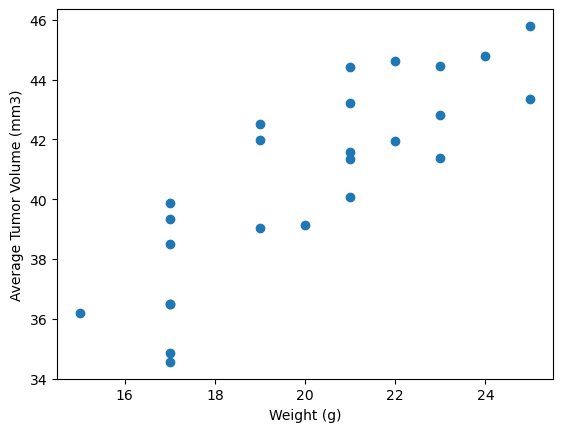

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = clean_challenge_df.loc[clean_challenge_df['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID']).mean()
weight = capomulin_mice['Weight (g)']
t_volume = capomulin_mice['Tumor Volume (mm3)']

plt.scatter(weight, t_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


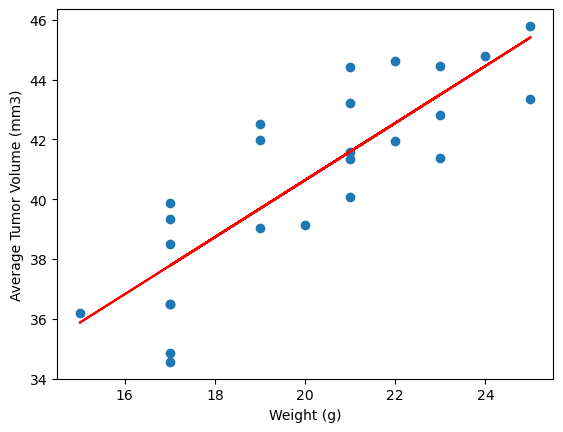

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Set variables to test
x_values = weight
y_values = t_volume

# Calculate correlation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(weight,t_volume)

# Draw scatter plot and include regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Display output
plt.show()